In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import rlway.osrd_import.infra as infr
import matplotlib.pyplot as plt

In [76]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [77]:
from rlway.schedules import Schedule, schedule_from_simulation

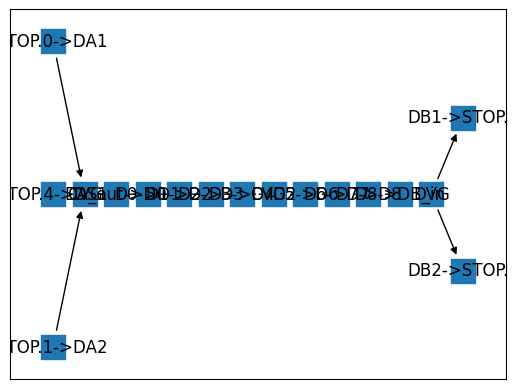

In [78]:
s = schedule_from_simulation(infra, res, simplify_route_names=True)
s.draw_graph()

In [79]:
infr.draw_infra(infra)

In [80]:
# s = s.sort()

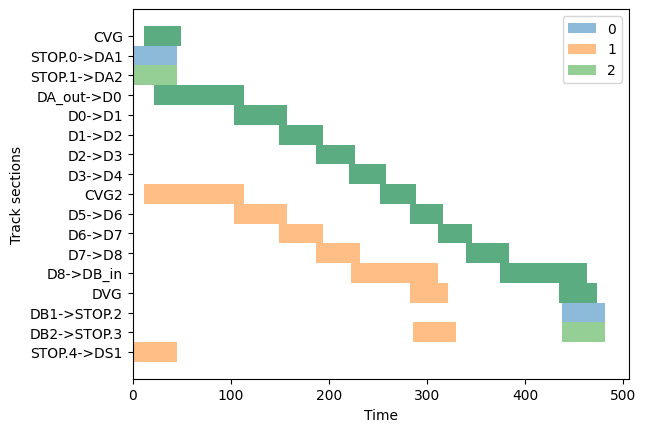

In [81]:
s.plot()


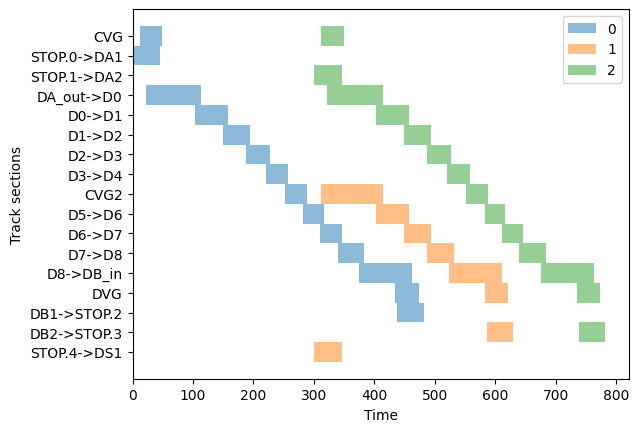

In [98]:
s.shift_train_departure(1, 300).shift_train_departure(2, 300).plot()

In [83]:
routes = infr.routes(infra)

Text(0, 0.5, 'Position')

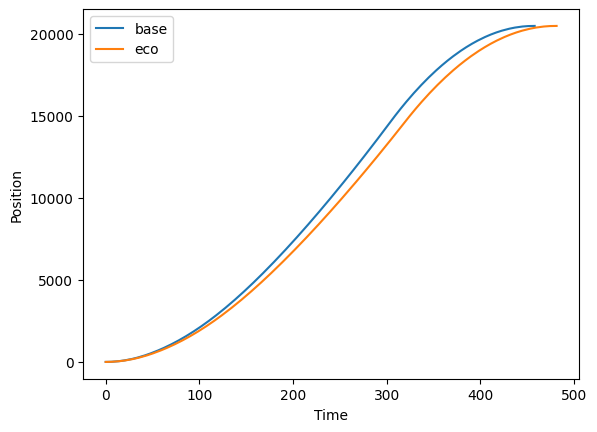

In [84]:
base_head_positions = res[0]['base_simulations'][0]['head_positions']
eco_head_positions = res[0]['eco_simulations'][0]['head_positions']

t_base = [dict['time'] for dict in base_head_positions]
y_base = [dict['path_offset'] for dict in base_head_positions]
t_eco = [dict['time'] for dict in eco_head_positions]
y_eco = [dict['path_offset'] for dict in eco_head_positions]
plt.plot(t_base, y_base, label='base')
plt.plot(t_eco, y_eco, label='eco')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')

Text(0, 0.5, 'speed')

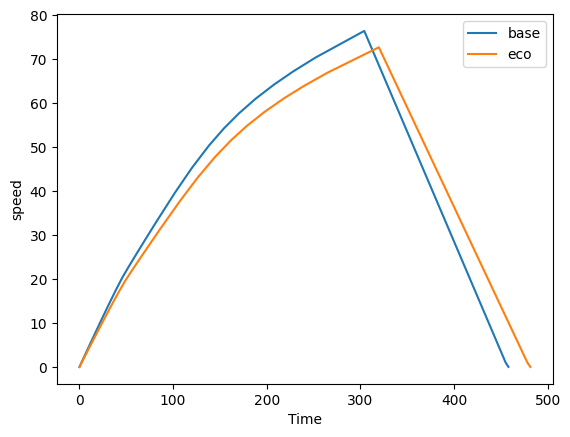

In [85]:
base_speeds = res[0]['base_simulations'][0]['speeds']
eco_speeds = res[0]['eco_simulations'][0]['speeds']
t__base = [dict['time'] for dict in base_speeds]
y__base = [dict['speed'] for dict in base_speeds]
t__eco = [dict['time'] for dict in eco_speeds]
y__eco = [dict['speed'] for dict in eco_speeds]
plt.plot(t__base, y__base, label='base')
plt.plot(t__eco, y__eco, label='eco')
plt.legend()
plt.xlabel('Time')
plt.ylabel('speed')

In [86]:
infr.route_limits(infra)

{'DA1': ('WEST_Q1', 430.0),
 'DA2': ('WEST_Q2', 430.0),
 'DA_out': ('T1', 50.0),
 'D0': ('T1', 1980.0),
 'D1': ('T1', 3960.0),
 'D2': ('T1', 5940.0),
 'D3': ('T1', 7920.0),
 'D4': ('T1', 9900.0),
 'D5': ('T2', 1980.0),
 'D6': ('T2', 3960.0),
 'D7': ('T2', 5940.0),
 'D8': ('T2', 7920.0),
 'DB_in': ('T2', 9970.0),
 'DB1': ('EAST_Q1', 30.0),
 'DB2': ('EAST_Q2', 30.0),
 'DS1': ('SOUTH_Q1', 430.0),
 'buffer_stop.0': ('WEST_Q1', 0.0),
 'buffer_stop.1': ('WEST_Q2', 0.0),
 'buffer_stop.2': ('EAST_Q1', 450.0),
 'buffer_stop.3': ('EAST_Q2', 450.0),
 'buffer_stop.4': ('SOUTH_Q1', 0.0)}

In [87]:
import networkx as nx
G = nx.DiGraph()

In [88]:
[
    G.add_edge(route.replace('rt.','').split('->')[0], route.replace('rt.','').split('->')[1])
    for route in infr.routes(infra)
]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

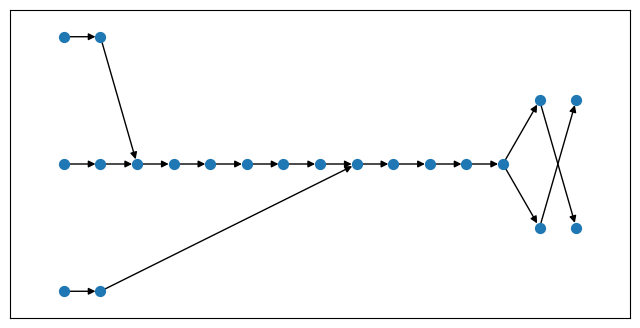

In [89]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

plt.figure(figsize=(8, 4))
nx.draw_networkx(G, pos, node_size=50, with_labels=False)

In [90]:
infr.track_section_lengths(infra)

{'WEST_Q1': 450.0,
 'WEST_Q2': 450.0,
 'T1': 10000.0,
 'T2': 10000.0,
 'EAST_Q1': 450.0,
 'EAST_Q2': 450.0,
 'SOUTH_Q1': 450.0}

In [91]:
infra['track_section_links']

[{'id': 'link.0',
  'src': {'endpoint': 'END', 'track': 'T1'},
  'dst': {'endpoint': 'BEGIN', 'track': 'T2'}},
 {'id': 'link.1',
  'src': {'endpoint': 'BEGIN', 'track': 'T1'},
  'dst': {'endpoint': 'END', 'track': 'WEST_Q1'}},
 {'id': 'link.2',
  'src': {'endpoint': 'BEGIN', 'track': 'T1'},
  'dst': {'endpoint': 'END', 'track': 'WEST_Q2'}},
 {'id': 'link.3',
  'src': {'endpoint': 'END', 'track': 'T2'},
  'dst': {'endpoint': 'BEGIN', 'track': 'EAST_Q1'}},
 {'id': 'link.4',
  'src': {'endpoint': 'END', 'track': 'T2'},
  'dst': {'endpoint': 'BEGIN', 'track': 'EAST_Q2'}},
 {'id': 'link.5',
  'src': {'endpoint': 'BEGIN', 'track': 'T2'},
  'dst': {'endpoint': 'END', 'track': 'T1'}},
 {'id': 'link.6',
  'src': {'endpoint': 'BEGIN', 'track': 'T2'},
  'dst': {'endpoint': 'END', 'track': 'SOUTH_Q1'}}]

In [92]:
[
    link['id']
    for link in infra['track_section_links']
]

['link.0', 'link.1', 'link.2', 'link.3', 'link.4', 'link.5', 'link.6']

In [93]:
infra['switches']

[{'id': 'CVG',
  'switch_type': 'point',
  'group_change_delay': 0.0,
  'ports': {'base': {'endpoint': 'BEGIN', 'track': 'T1'},
   'left': {'endpoint': 'END', 'track': 'WEST_Q1'},
   'right': {'endpoint': 'END', 'track': 'WEST_Q2'}},
  'extensions': {'sncf': {'label': 'CVG'}}},
 {'id': 'DVG',
  'switch_type': 'point',
  'group_change_delay': 0.0,
  'ports': {'base': {'endpoint': 'END', 'track': 'T2'},
   'left': {'endpoint': 'BEGIN', 'track': 'EAST_Q1'},
   'right': {'endpoint': 'BEGIN', 'track': 'EAST_Q2'}},
  'extensions': {'sncf': {'label': 'DVG'}}},
 {'id': 'CVG2',
  'switch_type': 'point',
  'group_change_delay': 0.0,
  'ports': {'base': {'endpoint': 'BEGIN', 'track': 'T2'},
   'left': {'endpoint': 'END', 'track': 'T1'},
   'right': {'endpoint': 'END', 'track': 'SOUTH_Q1'}},
  'extensions': {'sncf': {'label': 'CVG2'}}}]